# EDA Emissões de CTPS no Brasil em 2020

### Objetivo
Esta análise tem por objetivo identificar padrões e informações relevantes a respeito das emissões de Carteira de Trabalho e Previdência Social emitidas no Brasil no ano de 2020 como trabalho de conclusão do módulo de Estatística I da formação Vem Ser Tech - Ada & Ifood.
Realizaremos além da análise exploratória o processo de extração e transformação dos dados para normalização do conjunto de dados.

### Sobre os Dados
A base de dados selecionada é composta pelas Carteiras de Trabalho e Previdência Social (CTPS) emitidas no país em 2020. Essas carteiras contêm informações sobre as vias de emissão, datas de emissão, localidades e dados dos solicitantes, como idade, localidade, escolaridade, raça, estado civil e tipo de cidadania.

Com base nesses dados, é possível analisar diversos aspectos relacionados à força de trabalho durante esse período. Além disso, podemos investigar relações entre raça, sexo e outros fatores relevantes. Essa análise pode fornecer insights valiosos para políticas públicas, estratégias de emprego e igualdade de oportunidades.

### Perguntas a serem respondidas
- Quantas carteiras foram emitidas no ano de 2020?
- Quais os estados com maior número de emissão de carteiras?
- Quais os meses com maior número de emissão de carteiras?
- Qual o perfil das pessoas que solicitaram Carteira do Trabalho e Previdência Social no ano de 2020?

## Extração e Transformação e Carregamento - ETL

#### Importando Bibliotecas Utilizadas

In [1]:

import pandas as pd
import numpy as np
import datetime as datatoday
from unidecode import unidecode
from datetime import datetime
import matplotlib.pyplot as plt

#### Extraindo os Dados

In [2]:
df=pd.read_csv('basectps_inicial.csv',delimiter=";")
display(df)

,Tipo Protocolo,Nome Município Órgão,Sigla UF Órgão,Data Emissão,Sexo,Nível Escolaridade,Raça e Cor,Estado Civil,Data Nascimento,Tipo Cidadania,Nome Município Nascimento,Sigla UF Nascimento
0,1ª Via,TERESINA,PI,17/01/2020,FEMININO,SUPERIOR COMPL. OU HABILIT. LEGAL EQUIV.,Pardo,SOLTEIRO,07/05/1985,Brasileiro Nato,ALTOS,PI
1,1ª Via,TUNTUM,MA,07/02/2020,FEMININO,2º GRAU INCOMPLETO,Pardo,CASADO,01/08/1994,Brasileiro Nato,GONCALVES DIAS,MA
2,1ª Via,BELEM,PA,04/02/2020,FEMININO,2º GRAU COMPLETO OU TEC. PROFISSIONAL,Pardo,SOLTEIRO,23/03/1975,Brasileiro Nato,MARABA,PA
3,2ª Via,VITORIA DA CONQUISTA,BA,03/03/2020,MASCULINO,2º GRAU COMPLETO OU TEC. PROFISSIONAL,Pardo,CASADO,04/09/1986,Brasileiro Nato,CONDEUBA,BA
4,2ª Via,CORUMBIARA,RO,30/01/2020,FEMININO,2º GRAU COMPLETO OU TEC. PROFISSIONAL,Branco,SEPARADO J,21/10/1984,Brasileiro Nato,BETIM,MG
...,...,...,...,...,...,...,...,...,...,...,...,...
463933,1ª Via,MARTINOPOLIS,SP,30/12/2020,FEMININO,2º GRAU COMPLETO OU TEC. PROFISSIONAL,Pardo,SOLTEIRO,07/01/2003,Brasileiro Nato,MARTINOPOLIS,SP
463934,1ª Via,MARTINOPOLIS,SP,30/12/2020,MASCULINO,2º GRAU COMPLETO OU TEC. PROFISSIONAL,Branco,SOLTEIRO,28/01/2002,Brasileiro Nato,MARTINOPOLIS,SP
463935,1ª Via,MARTINOPOLIS,SP,30/12/2020,FEMININO,2º GRAU COMPLETO OU TEC. PROFISSIONAL,Branco,SOLTEIRO,07/11/2001,Brasileiro Nato,MARTINOPOLIS,SP
463936,2ª Via,BRUSQUE,SC,14/12/2020,FEMININO,2º GRAU COMPLETO OU TEC. PROFISSIONAL,Branco,SOLTEIRO,20/12/1987,Brasileiro Nato,LAGES,SC


#### Transformação dos Dados

Primeiro vamos verificar os tipos de dados e colunas disponíveis no dataframe usando o dtypes.

In [3]:
df.dtypes

Tipo Protocolo               object
Nome Município Órgão         object
Sigla UF Órgão               object
Data Emissão                 object
Sexo                         object
Nível Escolaridade           object
Raça e Cor                   object
Estado Civil                 object
Data Nascimento              object
Tipo Cidadania               object
Nome Município Nascimento    object
Sigla UF Nascimento          object
dtype: object

Para melhor visualização dos dados iremos aplicar uma transformação nos nomes das colunas removendo espaços, alterando todas as letras para minúsculas e removendo acentos.

In [4]:
colunas = ["Tipo Protocolo", "Nome Município Órgão", "Sigla UF Órgão", "Data Emissão", "Sexo", "Nível Escolaridade", "Raça e Cor", "Estado Civil", "Data Nascimento", "Tipo Cidadania", "Nome Município Nascimento", "Sigla UF Nascimento"]

df.columns = [unidecode(coluna).replace(" ", "_").lower() for coluna in colunas]

display(df)

,tipo_protocolo,nome_municipio_orgao,sigla_uf_orgao,data_emissao,sexo,nivel_escolaridade,raca_e_cor,estado_civil,data_nascimento,tipo_cidadania,nome_municipio_nascimento,sigla_uf_nascimento
0,1ª Via,TERESINA,PI,17/01/2020,FEMININO,SUPERIOR COMPL. OU HABILIT. LEGAL EQUIV.,Pardo,SOLTEIRO,07/05/1985,Brasileiro Nato,ALTOS,PI
1,1ª Via,TUNTUM,MA,07/02/2020,FEMININO,2º GRAU INCOMPLETO,Pardo,CASADO,01/08/1994,Brasileiro Nato,GONCALVES DIAS,MA
2,1ª Via,BELEM,PA,04/02/2020,FEMININO,2º GRAU COMPLETO OU TEC. PROFISSIONAL,Pardo,SOLTEIRO,23/03/1975,Brasileiro Nato,MARABA,PA
3,2ª Via,VITORIA DA CONQUISTA,BA,03/03/2020,MASCULINO,2º GRAU COMPLETO OU TEC. PROFISSIONAL,Pardo,CASADO,04/09/1986,Brasileiro Nato,CONDEUBA,BA
4,2ª Via,CORUMBIARA,RO,30/01/2020,FEMININO,2º GRAU COMPLETO OU TEC. PROFISSIONAL,Branco,SEPARADO J,21/10/1984,Brasileiro Nato,BETIM,MG
...,...,...,...,...,...,...,...,...,...,...,...,...
463933,1ª Via,MARTINOPOLIS,SP,30/12/2020,FEMININO,2º GRAU COMPLETO OU TEC. PROFISSIONAL,Pardo,SOLTEIRO,07/01/2003,Brasileiro Nato,MARTINOPOLIS,SP
463934,1ª Via,MARTINOPOLIS,SP,30/12/2020,MASCULINO,2º GRAU COMPLETO OU TEC. PROFISSIONAL,Branco,SOLTEIRO,28/01/2002,Brasileiro Nato,MARTINOPOLIS,SP
463935,1ª Via,MARTINOPOLIS,SP,30/12/2020,FEMININO,2º GRAU COMPLETO OU TEC. PROFISSIONAL,Branco,SOLTEIRO,07/11/2001,Brasileiro Nato,MARTINOPOLIS,SP
463936,2ª Via,BRUSQUE,SC,14/12/2020,FEMININO,2º GRAU COMPLETO OU TEC. PROFISSIONAL,Branco,SOLTEIRO,20/12/1987,Brasileiro Nato,LAGES,SC


Para melhorar a leitura e entendimento dos dados iremos renomear as colunas dos municípios e estados de emissão e nascimento.

In [5]:
df.rename(columns={'nome_municipio_orgao':'municipio_emissao',
                    'sigla_uf_orgao':'uf_emissao',
                    'nome_municipio_nascimento':'municipio_nascimento',
                    'sigla_uf_nascimento':'uf_nascimento'}, inplace=True)

In [6]:
# visualizando o cabeçalho do dataframe para conferir as alterações feitas
df.head(2)

,tipo_protocolo,municipio_emissao,uf_emissao,data_emissao,sexo,nivel_escolaridade,raca_e_cor,estado_civil,data_nascimento,tipo_cidadania,municipio_nascimento,uf_nascimento
0,1ª Via,TERESINA,PI,17/01/2020,FEMININO,SUPERIOR COMPL. OU HABILIT. LEGAL EQUIV.,Pardo,SOLTEIRO,07/05/1985,Brasileiro Nato,ALTOS,PI
1,1ª Via,TUNTUM,MA,07/02/2020,FEMININO,2º GRAU INCOMPLETO,Pardo,CASADO,01/08/1994,Brasileiro Nato,GONCALVES DIAS,MA


In [7]:
# usando o dropna para remover linhas vazias
df = df.dropna()
df.head()

,tipo_protocolo,municipio_emissao,uf_emissao,data_emissao,sexo,nivel_escolaridade,raca_e_cor,estado_civil,data_nascimento,tipo_cidadania,municipio_nascimento,uf_nascimento
0,1ª Via,TERESINA,PI,17/01/2020,FEMININO,SUPERIOR COMPL. OU HABILIT. LEGAL EQUIV.,Pardo,SOLTEIRO,07/05/1985,Brasileiro Nato,ALTOS,PI
1,1ª Via,TUNTUM,MA,07/02/2020,FEMININO,2º GRAU INCOMPLETO,Pardo,CASADO,01/08/1994,Brasileiro Nato,GONCALVES DIAS,MA
2,1ª Via,BELEM,PA,04/02/2020,FEMININO,2º GRAU COMPLETO OU TEC. PROFISSIONAL,Pardo,SOLTEIRO,23/03/1975,Brasileiro Nato,MARABA,PA
3,2ª Via,VITORIA DA CONQUISTA,BA,03/03/2020,MASCULINO,2º GRAU COMPLETO OU TEC. PROFISSIONAL,Pardo,CASADO,04/09/1986,Brasileiro Nato,CONDEUBA,BA
4,2ª Via,CORUMBIARA,RO,30/01/2020,FEMININO,2º GRAU COMPLETO OU TEC. PROFISSIONAL,Branco,SEPARADO J,21/10/1984,Brasileiro Nato,BETIM,MG


In [8]:
# usando o count() para verificar se nosso dataframe está homogêneo com todas as colunas possuindo o mesmo número de linhas
df.count()

tipo_protocolo          463938
municipio_emissao       463938
uf_emissao              463938
data_emissao            463938
sexo                    463938
nivel_escolaridade      463938
raca_e_cor              463938
estado_civil            463938
data_nascimento         463938
tipo_cidadania          463938
municipio_nascimento    463938
uf_nascimento           463938
dtype: int64

Ao verficar a coluna `nivel_escolaridade` observamos que possui uma grande variedade de dados diferentes para descrever a escolaridade dos cidadãos então optamos por criar uma nova coluna e condensar essas informações para uma melhor leitura dos dados.

In [9]:
#Vamos condensar o nível de escolaridade para facilitar nas análises:
escolaridade_condensada = {
    "1º GRAU COMPLETO ATÉ 8ª SÉRIE COMP.": "Fundamental Completo",
    "1º GRAU INCOMP. 5ª A 8ª SÉRIE INCOMP.": "Fundamental Incompleto",
    "1º GRAU INCOMP. ATÉ A 4ª SÉRIE INCOMP.": "Fundamental Incompleto",
    "1º GRAU INCOMPLETO ATÉ A 4ª SÉRIE COMP.": "Fundamental Incompleto",
    "2º GRAU COMPLETO OU TEC. PROFISSIONAL": "Ensino Médio Completo",
    "2º GRAU INCOMPLETO": "Ensino Médio Incompleto",
    "ALFABETIZADO SEM CURSOS REGULARES": "Alfabetizado",
    "ANALFABETO": "Analfabeto",
    "APERFEICOAMENTO": "Aperfeiçoamento",
    "DOUTORADO": "Doutorado",
    "ESPECIALIZACAO": "Especialização",
    "LIVRE DOCENCIA": "Livre Docência",
    "MESTRADO": "Mestrado",
    "PHD": "Doutorado",
    "POS DOCTOR": "Pós-Doutorado",
    "POS GRADUACAO": "Pós-Graduação",
    "SEMIANALFABETO": "Semianalfabeto",
    "SUPERIOR COMPL. OU HABILIT. LEGAL EQUIV.": "Superior Completo",
    "SUPERIOR INCOMPLETO": "Superior Incompleto",
}


df["escolaridade_condensada"] = df["nivel_escolaridade"].apply(lambda x: escolaridade_condensada[x])

df.head()

,tipo_protocolo,municipio_emissao,uf_emissao,data_emissao,sexo,nivel_escolaridade,raca_e_cor,estado_civil,data_nascimento,tipo_cidadania,municipio_nascimento,uf_nascimento,escolaridade_condensada
0,1ª Via,TERESINA,PI,17/01/2020,FEMININO,SUPERIOR COMPL. OU HABILIT. LEGAL EQUIV.,Pardo,SOLTEIRO,07/05/1985,Brasileiro Nato,ALTOS,PI,Superior Completo
1,1ª Via,TUNTUM,MA,07/02/2020,FEMININO,2º GRAU INCOMPLETO,Pardo,CASADO,01/08/1994,Brasileiro Nato,GONCALVES DIAS,MA,Ensino Médio Incompleto
2,1ª Via,BELEM,PA,04/02/2020,FEMININO,2º GRAU COMPLETO OU TEC. PROFISSIONAL,Pardo,SOLTEIRO,23/03/1975,Brasileiro Nato,MARABA,PA,Ensino Médio Completo
3,2ª Via,VITORIA DA CONQUISTA,BA,03/03/2020,MASCULINO,2º GRAU COMPLETO OU TEC. PROFISSIONAL,Pardo,CASADO,04/09/1986,Brasileiro Nato,CONDEUBA,BA,Ensino Médio Completo
4,2ª Via,CORUMBIARA,RO,30/01/2020,FEMININO,2º GRAU COMPLETO OU TEC. PROFISSIONAL,Branco,SEPARADO J,21/10/1984,Brasileiro Nato,BETIM,MG,Ensino Médio Completo


Verificando a coluna `uf_emissao` observamos 12 linhas com a sigla *IG* que não corresponde a nenhum estado brasileiro então optamos por excluir essas linhas pois não afetarão nos resultados das nossas análises.

In [10]:
df.groupby('uf_emissao').size()

uf_emissao
AC     1899
AL     4395
AM    13127
AP       46
BA    68023
CE    18399
DF      123
ES     5394
GO    23878
IG       12
MA    20390
MG    81148
MS    14329
MT     6166
PA    31121
PB     2061
PE    32757
PI     8651
PR    37186
RJ    68988
RN     2206
RO     7427
RR     4402
RS      348
SC      941
SE     6854
SP     1735
TO     1932
dtype: int64

In [38]:
# para excluir as linhas com IG realizamos a operação abaixo atribuindo à coluna emissao_uf os dados diferentes de IG
df = df[df['uf_emissao'] != 'IG']

Verificandos os tipos dos dados podemos observar que estão todos como o tipo `object` e para utilizar as datas corretamente precisamos transformar para o tipo correto.

In [39]:
df.dtypes

tipo_protocolo                     object
municipio_emissao                  object
uf_emissao                         object
data_emissao               datetime64[ns]
sexo                               object
nivel_escolaridade                 object
raca_e_cor                         object
estado_civil                       object
data_nascimento                    object
tipo_cidadania                     object
municipio_nascimento               object
uf_nascimento                      object
escolaridade_condensada            object
idade                               int64
dtype: object

In [40]:
# transformando as datas para o tipo correto
df.data_emissao = pd.to_datetime(df.data_emissao, format='%d/%m/%Y')
df.data_nascimento = pd.to_datetime(df.data_nascimento, format='%d/%m/%Y')

In [41]:
# verificando as transformações de data
df.dtypes 

tipo_protocolo                     object
municipio_emissao                  object
uf_emissao                         object
data_emissao               datetime64[ns]
sexo                               object
nivel_escolaridade                 object
raca_e_cor                         object
estado_civil                       object
data_nascimento            datetime64[ns]
tipo_cidadania                     object
municipio_nascimento               object
uf_nascimento                      object
escolaridade_condensada            object
idade                               int64
dtype: object

Iremos criar uma coluna com a idade dos cidadões que solicitaram emissão de CTPS para realizar uma análise estatística.

In [42]:
# criando a coluna idade realizando a subtração da data autal pela data de nascimento. Utilizamos a divisão do valor por 365.25 para incluir anos bissextos.

data_atual = datetime.now()
df['idade'] = (data_atual - df['data_nascimento']) // pd.Timedelta(days=365.25)
df.head()

,tipo_protocolo,municipio_emissao,uf_emissao,data_emissao,sexo,nivel_escolaridade,raca_e_cor,estado_civil,data_nascimento,tipo_cidadania,municipio_nascimento,uf_nascimento,escolaridade_condensada,idade
0,1ª Via,TERESINA,PI,2020-01-17,FEMININO,SUPERIOR COMPL. OU HABILIT. LEGAL EQUIV.,Pardo,SOLTEIRO,1985-05-07,Brasileiro Nato,ALTOS,PI,Superior Completo,38
1,1ª Via,TUNTUM,MA,2020-02-07,FEMININO,2º GRAU INCOMPLETO,Pardo,CASADO,1994-08-01,Brasileiro Nato,GONCALVES DIAS,MA,Ensino Médio Incompleto,29
2,1ª Via,BELEM,PA,2020-02-04,FEMININO,2º GRAU COMPLETO OU TEC. PROFISSIONAL,Pardo,SOLTEIRO,1975-03-23,Brasileiro Nato,MARABA,PA,Ensino Médio Completo,48
3,2ª Via,VITORIA DA CONQUISTA,BA,2020-03-03,MASCULINO,2º GRAU COMPLETO OU TEC. PROFISSIONAL,Pardo,CASADO,1986-09-04,Brasileiro Nato,CONDEUBA,BA,Ensino Médio Completo,37
4,2ª Via,CORUMBIARA,RO,2020-01-30,FEMININO,2º GRAU COMPLETO OU TEC. PROFISSIONAL,Branco,SEPARADO J,1984-10-21,Brasileiro Nato,BETIM,MG,Ensino Médio Completo,39


Com a criação da coluna `idade` nós finalizamos as transformações necessárias do nosso dataframe e partiremos para as análises.
Mais uma vez utilizamos o `dtypes` para verficar os tipos de dados do dataframe e certificar de que estão certos para usar em nossas análises. 

É possível observer que as datas agora estão no formato correto (`datetime64`) e que a coluna idade também está com o tipo de dado correto (`int64`).

Podemos então fazer o carregamento dos dados para um arquivo final.

In [43]:
# verificando os tipos de dados 
df.dtypes

tipo_protocolo                     object
municipio_emissao                  object
uf_emissao                         object
data_emissao               datetime64[ns]
sexo                               object
nivel_escolaridade                 object
raca_e_cor                         object
estado_civil                       object
data_nascimento            datetime64[ns]
tipo_cidadania                     object
municipio_nascimento               object
uf_nascimento                      object
escolaridade_condensada            object
idade                               int64
dtype: object

#### Carregamento dos Dados

In [44]:
# exportando nosso dataframe para um arquivo csv. Usamos o parâmetro index=False para ignorar o índice do dataframe e não criar uma coluna duplicada de índice no arquivo e o date_format para garantir que as datas se mantenham no formato correto.
df.to_csv('basectps_tratada.csv', index=False, date_format='%d/%m/%Y')

## Análises

In [45]:
# fazendo a leitura do arquivo
df = pd.read_csv("basectps_tratada.csv")

Verificando os tipos de dados observamos que apesar de ter estabelecido o formato das datas ao carregar os dados na etapa de ETL o arquivo tratado não manteve o formato, então iremos modificar a coluna `data_emissao` para o tipo correto pois precisaremos dela futuramente.

In [46]:
df.dtypes

tipo_protocolo             object
municipio_emissao          object
uf_emissao                 object
data_emissao               object
sexo                       object
nivel_escolaridade         object
raca_e_cor                 object
estado_civil               object
data_nascimento            object
tipo_cidadania             object
municipio_nascimento       object
uf_nascimento              object
escolaridade_condensada    object
idade                       int64
dtype: object

In [47]:
df.data_emissao = pd.to_datetime(df.data_emissao, format='%d/%m/%Y')

In [48]:
# verificando as alterações aplicadas
df.dtypes

tipo_protocolo                     object
municipio_emissao                  object
uf_emissao                         object
data_emissao               datetime64[ns]
sexo                               object
nivel_escolaridade                 object
raca_e_cor                         object
estado_civil                       object
data_nascimento                    object
tipo_cidadania                     object
municipio_nascimento               object
uf_nascimento                      object
escolaridade_condensada            object
idade                               int64
dtype: object

#### Perfil de Idade

Usando o método `describe()` temos um resumo estatístico da coluna `idade`.

Podemos observar que a **média** das idades é de aproximadamente 29 anos.

A **menor** idade registrada é de 17 anos e a **maior** idade é de 113 anos.

Temos também as informações referentes aos quartis onde 25% dos cidadãos possuem até 21 anos e **metade** das pessoas que solicitaram a emissão da CTPS possuem **até 23 anos**. Verificamos também que a grande maioria das CTPS (**75%**) foram emitidas para pessoas com **até 34 anos**.

In [49]:
df.describe()

,data_emissao,idade
count,463926,463926.000000
mean,2020-02-11 21:52:28.655604736,28.956454
min,2020-01-02 00:00:00,17.000000
25%,2020-01-20 00:00:00,21.000000
50%,2020-02-03 00:00:00,23.000000
75%,2020-02-19 00:00:00,34.000000
max,2020-12-31 00:00:00,113.000000
std,NaN,12.187213


Vamos usar o gráfico de boxplot para verificar a distribuição das idades de acordo com os dados acima.

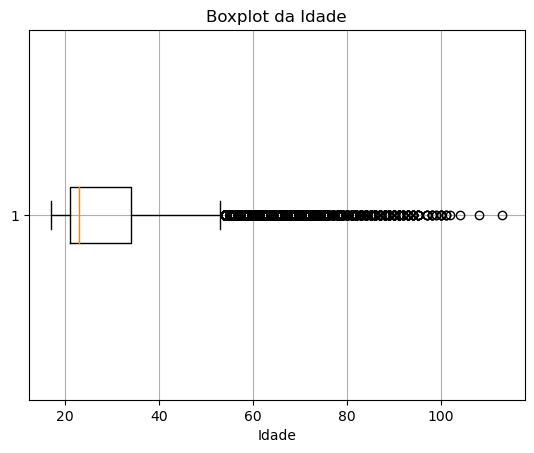

In [50]:
plt.boxplot(df['idade'], vert=False,)  # vert=False para orientação horizontal
plt.xlabel('Idade')
plt.title('Boxplot da Idade')
plt.grid(True)
plt.show()

Agora vamos ver a distribuição das idades usando um histograma.

Confirmando o que vimos no resumo dos dados e no boxplot podemos ver a grande concentração de emissões até aproximadamente 30 anos.

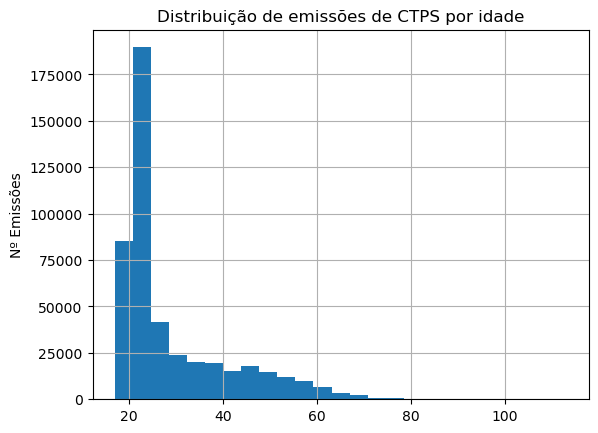

In [51]:
df['idade'].hist(bins=25)
plt.title('Distribuição de emissões de CTPS por idade')
plt.ylabel('Nº Emissões')
plt.show()

#### Perfil de sexo

Vamos verificar agora como é a distribuição da emissão de carteiras por sexo.

Observamos uma distribuição equilibrada com **51.84%** para Masculino e **48.16%** para Feminino.

In [52]:
# calculando o percentual de emissões para cada sexo

percentual_sexo = df['sexo'].value_counts(normalize=True) * 100

print("Percentual de cada sexo em relação ao total:")
print(percentual_sexo)


Percentual de cada sexo em relação ao total:
sexo
MASCULINO    51.835638
FEMININO     48.164362
Name: proportion, dtype: float64


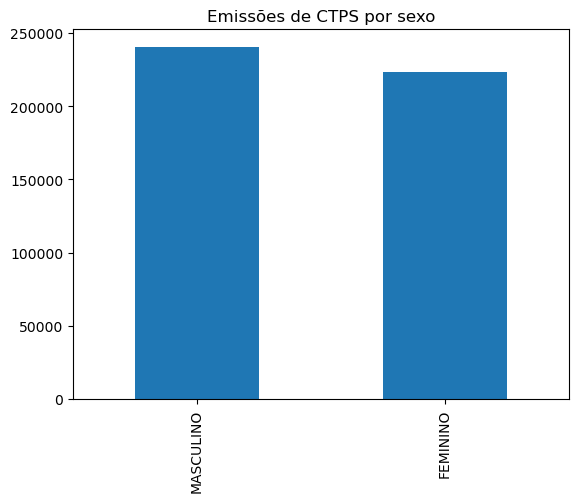

In [53]:
# plotando o gráfico da distribuição por sexo
df['sexo'].value_counts().plot.bar()
plt.title('Emissões de CTPS por sexo')
plt.xlabel(None)
plt.show()

#### Perfil de escolaridade

Em relação às emissões por nível de escolaridade temos a maioria do cidadãos com Ensino Médio Completo representanto **32.92%** das CTPS emitidas em 2020. Seguindo temos Ensino Médio Incompleto com **29.60%** das emissões e Fundamental Incompleto com **18.91%** de emissões. 

Esses três grupos representam **81.43%** das carteiras emitidas em 2020 e é compreensível visto que as pessoas buscam pelo serviço de emissão neste período de escolaridade.

In [54]:
percentual_escolaridade = df['escolaridade_condensada'].value_counts(normalize=True) * 100

print("Percentual de cada escolaridade em relação ao total:")
print(percentual_escolaridade)

Percentual de cada escolaridade em relação ao total:
escolaridade_condensada
Ensino Médio Completo      32.922061
Ensino Médio Incompleto    29.604075
Fundamental Incompleto     18.916594
Fundamental Completo        7.564137
Superior Incompleto         5.051883
Superior Completo           3.573415
Analfabeto                  1.035726
Alfabetizado                0.857033
Pós-Graduação               0.267068
Especialização              0.070270
Mestrado                    0.059061
Semianalfabeto              0.047421
Doutorado                   0.019615
Aperfeiçoamento             0.009915
Pós-Doutorado               0.001293
Livre Docência              0.000431
Name: proportion, dtype: float64


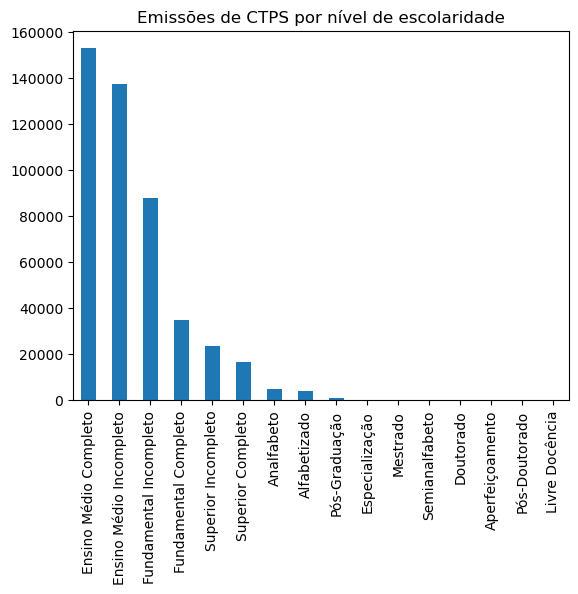

In [55]:
# plotando o gráfico das emissões por nível de escolaridade
df['escolaridade_condensada'].value_counts().plot.bar()
plt.title('Emissões de CTPS por nível de escolaridade')
plt.xlabel(None)
plt.show()

Analisando as médias de idades por escolaridade podemos observar que as modalidades *Livre Docência*, *Ensino Médio Incompleto* e *Superior Incompleto* possuem as menores médias com **21, 23 e 27** anos respectivamente.

Já as categorias com maiores médias de idade são *Semianalfabeto, Analfabeto e Alfabetizado* com **54, 54 e 52** anos respectivamente.

In [56]:
media_idade_por_esc = df.groupby('escolaridade_condensada')['idade'].mean().sort_values()
print(media_idade_por_esc)

escolaridade_condensada
Livre Docência             21.000000
Ensino Médio Incompleto    23.357548
Superior Incompleto        27.515254
Ensino Médio Completo      28.497283
Fundamental Completo       28.856862
Fundamental Incompleto     34.486036
Superior Completo          37.596875
Mestrado                   39.857664
Doutorado                  41.747253
Aperfeiçoamento            41.782609
Pós-Graduação              42.983858
Especialização             43.380368
Pós-Doutorado              47.333333
Alfabetizado               52.557093
Analfabeto                 54.236629
Semianalfabeto             54.531818
Name: idade, dtype: float64


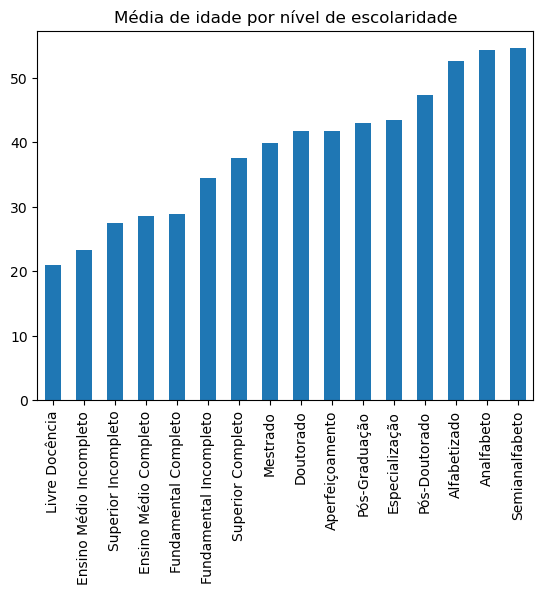

In [57]:

df.groupby('escolaridade_condensada')['idade'].mean().sort_values().plot.bar()
plt.title('Média de idade por nível de escolaridade')
plt.xlabel(None)
plt.show()

#### Perfil de raça

Se tratando de raça e cor observamos que **mais da metade dos trabalhadores** se identificam como **Pardos (62,82%)** seguidos de Brancos e Negros.

In [80]:
# Calcular o número de emissões por raça/cor
emissoes_por_raca = df['raca_e_cor'].value_counts().reset_index()
emissoes_por_raca.columns = ['Raça/Cor', 'Número de Emissões']

# Calcular o percentual de emissões por raça/cor
total_emissoes = len(df)
emissoes_por_raca['Percentual de Emissões'] = (emissoes_por_raca['Número de Emissões'] / total_emissoes) * 100

print(emissoes_por_raca)

   Raça/Cor  Número de Emissões  Percentual de Emissões
0     Pardo              291442               62.820795
1    Branco              110587               23.837207
2     Negro               56980               12.282131
3   Amarelo                3406                0.734169
4  Indígena                1511                0.325698


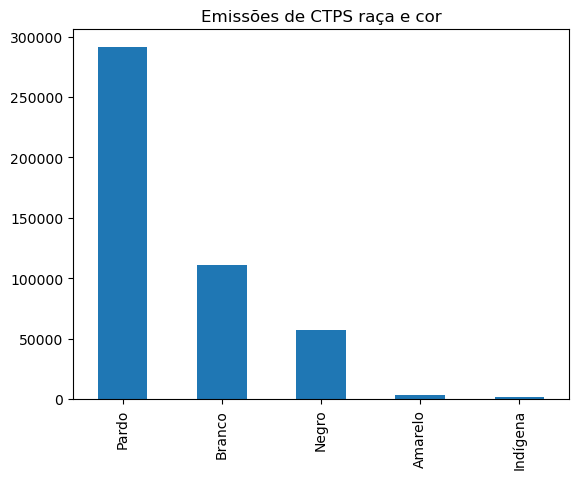

In [83]:
df['raca_e_cor'].value_counts().plot.bar()
plt.title('Emissões de CTPS raça e cor')
plt.xlabel(None)
plt.show()

#### Perfil do estado civil

Os solteiros estão entre os que mais solicitaram emissões de CTPS no ano de 2020 representando mais de **80%** das carteiras emitidas no ano com quase **400.000** emissões.

In [84]:
# Calcular o número de emissões por raça/cor
emissoes_estado_civil = df['estado_civil'].value_counts().reset_index()
emissoes_estado_civil.columns = ['Estado Civil', 'Número de Emissões']

# Calcular o percentual de emissões por raça/cor
total_emissoes = len(df)
emissoes_estado_civil['Percentual de Emissões'] = (emissoes_estado_civil['Número de Emissões'] / total_emissoes) * 100

print(emissoes_estado_civil)

  Estado Civil  Número de Emissões  Percentual de Emissões
0     SOLTEIRO              398800               85.961985
1       CASADO               53221               11.471873
2   DIVORCIADO               10110                2.179227
3        VIÚVO                1132                0.244004
4   SEPARADO J                 663                0.142911


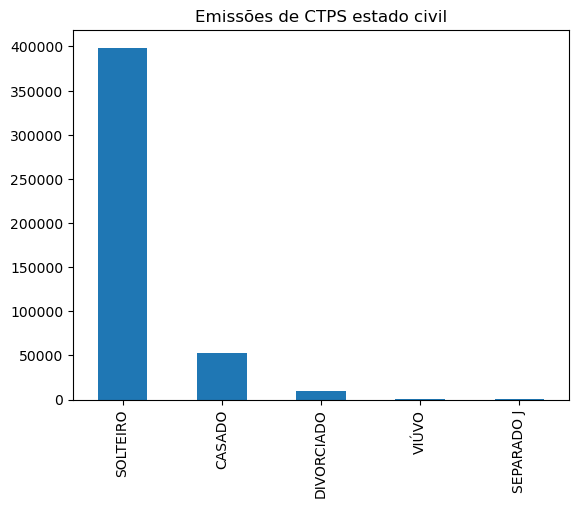

In [85]:
df['estado_civil'].value_counts().plot.bar()
plt.title('Emissões de CTPS estado civil')
plt.xlabel(None)
plt.show()

#### Análise número de emissões

Vamos analisar também qual o número de emissões para 1ª via e 2ª via da Carteira de Trabalho.

Como esperado temos um maior número de carterias sendo emitidas pela primeria vez, totalizando **336.877** carteiras contra **127.061** emissões para 2ª via.

In [58]:
emissao_por_via = df.tipo_protocolo.value_counts()
print('Número de emissões por via: ')
print(emissao_por_via)

Número de emissões por via: 
tipo_protocolo
1ª Via    336869
2ª Via    127057
Name: count, dtype: int64


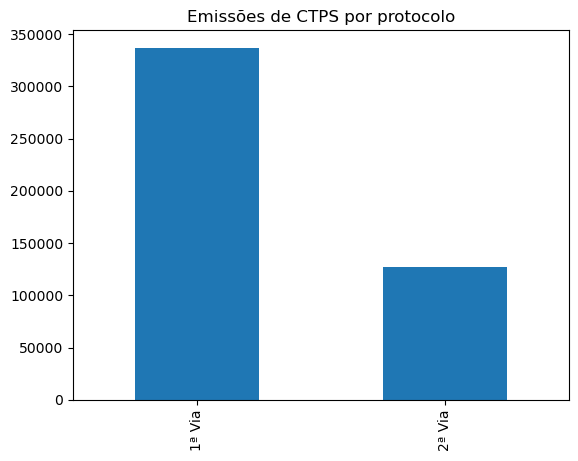

In [59]:
df['tipo_protocolo'].value_counts().plot.bar()
plt.title('Emissões de CTPS por protocolo')
plt.xlabel(None)
plt.show()

Em relação a distribuição de carteiras emitidas por estado podemos observar que as emissões se concentram nos estados de Minas Gerais (MG), Rio de Janeiro (RJ) e Bahia (BA) totalizando 47,04% e que aproximadamente 70% de todas as carteiras de trabalho emitidas em 2020 abrangem seis estados, além dos já citados temos também Paraná (PR), Pernambuco (PE) e o estado do Pará (PA).

In [60]:
# Calcular o número de emissões por UF
emissoes_por_uf = df['uf_emissao'].value_counts().reset_index()
emissoes_por_uf.columns = ['UF', 'Número de Emissões']

# Calcular o percentual de emissões por UF
total_emissoes = len(df)
emissoes_por_uf['Percentual de Emissões'] = (emissoes_por_uf['Número de Emissões'] / total_emissoes) * 100

print(emissoes_por_uf)

    UF  Número de Emissões  Percentual de Emissões
0   MG               81148               17.491583
1   RJ               68988               14.870475
2   BA               68023               14.662468
3   PR               37186                8.015502
4   PE               32757                7.060824
5   PA               31121                6.708182
6   GO               23878                5.146942
7   MA               20390                4.395097
8   CE               18399                3.965934
9   MS               14329                3.088639
10  AM               13127                2.829546
11  PI                8651                1.864737
12  RO                7427                1.600902
13  SE                6854                1.477391
14  MT                6166                1.329091
15  ES                5394                1.162685
16  RR                4402                0.948858
17  AL                4395                0.947349
18  RN                2206     

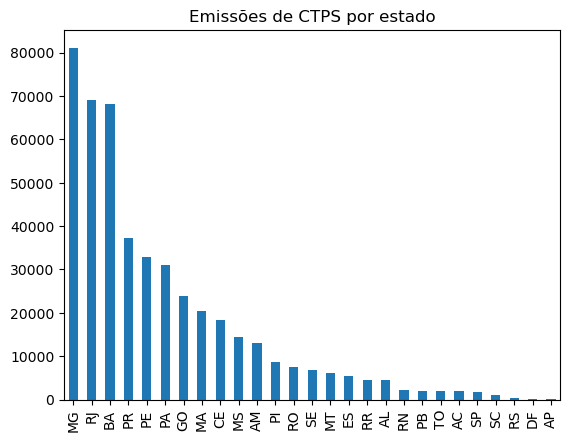

In [61]:
df['uf_emissao'].value_counts().plot.bar()
plt.title('Emissões de CTPS por estado')
plt.xlabel(None)
plt.show()

In [66]:
# criando uma coluna mes para fazer as análises de distribuição por mês
df['mes'] = df['data_emissao'].dt.month

Os meses que possuem maior concentração no número de emissões são **Janeiro, Fevereiro e Março**. 

Este resultado já era esperado visto que em março de 2020 foi decretado o início da pandemia de Covid e início das medidas de isolamento social e suspensão de serviços não essenciais aos cidadãos.

In [68]:
df.groupby('mes').size()

mes
1     224823
2     154379
3      63340
4       2350
5       2029
6       1943
7       2755
8       3480
9       3572
10      2281
11      1759
12      1215
dtype: int64

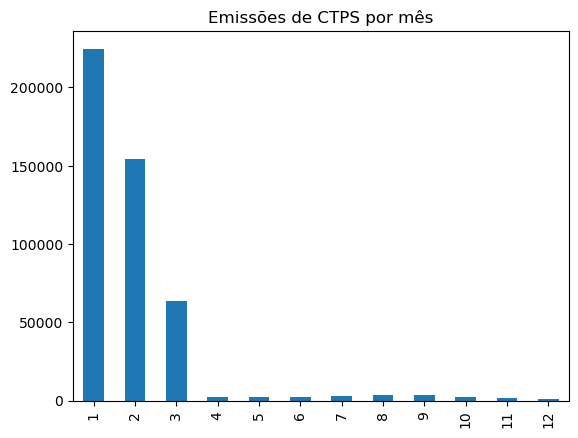

In [76]:
df.groupby('mes').size().plot.bar()
plt.title('Emissões de CTPS por mês')
plt.xlabel(None)
plt.show()

## Conclusões
Ao realizar esta análise foi constatado que foram emitidas aproximadamente 464 mil carteiras de trabalho no ano de 2020 e os meses com maior número de emissões foram de Janeiro a Março de 2020, o que já era esperado devido ao início da pandemia em meados de Março.

Já os estados que mais emitiram carteira de trabalho foram Minas Gerais, Rio de Janeiro e Bahia concentrando quase 50% das emissões. Curiosamente o estado de SP, que possui a maior cidade da América Latina, ficou entre os que menos emitiram novas carteiras de trabalho.

Sobre o perfil dos trabalhadores podemos dizer que a distribuição entre os gêneros é equilibrada, cerca de 90% possui até o 2º grau completo, a maior parcela é de solteiros e a raça/cor predominante é de pessoas que se declaram pardas. 

Já em relação a idade temos a maior concentração entre jovens na faixa de 14 a 23 anos de idade, o que também é esperado visto que é a faixa onde as pessoas costumam entrar no mercado de trabalho seja como aprendiz (abaixo de 18 anos) ou como trabalhador formal (a partir de 18 anos).